# Actividad evaluación de modelos

Evaluar un modelo de machine learning es un proceso fundamental. En particular, analizar el grado de sesgo y varianza resulta esencial para comprender su desempeño y capacidad de generalización.

En este cuaderno trabajaremos con el dataset Diabetes disponible en scikit-learn, sobre el cual ajustaremos diferentes modelos de regresión. Posteriormente, construiremos curvas de aprendizaje y de validación con el fin de obtener información sobre el nivel de sesgo y varianza presente en cada modelo.

Además, se te pedirá responder algunas preguntas y completar fragmentos de código, lo que permitirá reforzar los conceptos vistos y consolidar tu comprensión del proceso de evaluación de modelos.

### Dataset

En este dataset vamos a utilizar el dataset sintético Diabetes.

https://www.geeksforgeeks.org/machine-learning/sklearn-diabetes-dataset/

Diabetes dataset
- 442 muestras (filas)
- 10 caracteristicas (columnas)

Características:
- age – Edad del paciente.
- sex – Sexo del paciente.
- bmi – Índice de masa corporal (body mass index).
- bp – Presión arterial promedio.
- s1 – Medida de colesterol sérico.
- s2 – LDL (lipoproteínas de baja densidad).
- s3 – HDL (lipoproteínas de alta densidad).
- s4 – Relación de colesterol total con HDL.
- s5 – Nivel de triglicéridos en sangre.
- s6 – Nivel de glucosa en sangre.

Variable objetivo:

Una medida cuantitativa de la progresión de la diabetes un año después de la primera observación.

### SGDRegressor

Como un primer ejemplo, vamos a crear una curva de aprendizaje para un Regresor de la clase SGDRegressor.

Media por característica:
[-1.44429466e-18  2.54321451e-18 -2.25592546e-16 -4.85408596e-17
 -1.42859580e-17  3.89881064e-17 -6.02836031e-18 -1.78809958e-17
  9.24348582e-17  1.35176953e-17]

Desviación estándar por característica:
[0.04756515 0.04756515 0.04756515 0.04756515 0.04756515 0.04756515
 0.04756515 0.04756515 0.04756515 0.04756515]


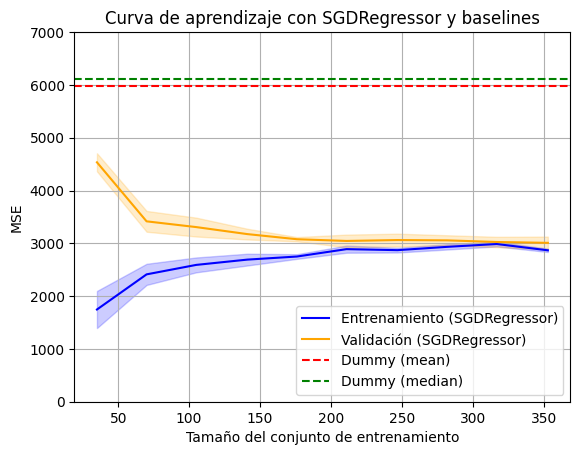

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import learning_curve, cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Datos
X, y = load_diabetes(return_X_y=True)

# Verificamos mean y std de cada característica
print("Media por característica:")
print(np.mean(X, axis=0))
print("\nDesviación estándar por característica:")
print(np.std(X, axis=0))


# Modelo real (pipeline con escalado + SGD)
model = make_pipeline(
    StandardScaler(),             # Para que la desviación estandar sea de 1
    SGDRegressor(
        loss="squared_error",     # equivalente a MSE
        learning_rate="constant",
        eta0=1e-3,                # tasa de aprendizaje inicial
        max_iter=2000,            # más iteraciones para asegurar convergencia
        tol=1e-3,
        random_state=42,
    )
)

# Curva de aprendizaje del modelo
train_sizes, train_scores, val_scores = learning_curve(
    model, X, y, cv=5, scoring="neg_mean_squared_error",
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Medias y desviaciones
train_mean = -np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
val_mean   = -np.mean(val_scores, axis=1)
val_std    = np.std(val_scores, axis=1)

# ======== Baselines ========

# DummyRegressor con media
dummy_mean = DummyRegressor(strategy="mean")
dummy_mean_scores = cross_val_score(dummy_mean, X, y, cv=5, scoring="neg_mean_squared_error")
baseline_mean = -np.mean(dummy_mean_scores)

# DummyRegressor con mediana
dummy_median = DummyRegressor(strategy="median")
dummy_median_scores = cross_val_score(dummy_median, X, y, cv=5, scoring="neg_mean_squared_error")
baseline_median = -np.mean(dummy_median_scores)

# ======== Gráfica ========

plt.plot(train_sizes, train_mean, label="Entrenamiento (SGDRegressor)", color="blue")
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2, color="blue")

plt.plot(train_sizes, val_mean, label="Validación (SGDRegressor)", color="orange")
plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.2, color="orange")

# Líneas horizontales de los baselines
plt.axhline(y=baseline_mean, color="red", linestyle="--", label="Dummy (mean)")
plt.axhline(y=baseline_median, color="green", linestyle="--", label="Dummy (median)")

plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("MSE")
plt.title("Curva de aprendizaje con SGDRegressor y baselines")
plt.ylim(0, 7000)
plt.legend()
plt.grid()
plt.show()

Edita esta celda para dar respuesta a las siguientes preguntas:

1. ¿Por qué utilizamos validación cruzada para generar la curva de aprendizaje?
2. ¿El desempeño del modelo con estos parámetros se beneficiaría si aumentamos el número de ejemplos de entrenamiento?
3. ¿Qué grado de sesgo presenta el modelo al inicio y al final del entrenamiento?
4. ¿Qué grado de varianza presenta el modelo al inicio y al final del entrenamiento?



1.- Para obtener una estimación más robusta del desempeño del modelo en datos no vistos. 2.- Agregar más datos de entrenamiento podría ofrecer una ligera mejora en el rendimiento de generalización, pero probablemente no una mejora sustancial. 3.- Inicio: El sesgo es relativamente bajo, ya que el error de entrenamiento es bajo. Final: El error de validación es significativamente más alto que el error de entrenamiento, lo que indica un sesgo moderado. 4.- Inicio: El modelo se ajusta demasiado a los pocos datos de entrenamiento, lo que lo hace muy sensible a los datos específicos. Final: Con más datos, el modelo se vuelve menos propenso a sobreajustarse y su rendimiento en datos no vistos es más consistente.

### Regresión polinomial

Modifica el código anterior para incluir términos de segundo orden y las interacciones entre las variables (features). Puedes copiar el código de la celda anterior y modificar únicamente la parte necesaria. De esta forma podrás comparar ambas gráficas.

Para ello, puedes utilizar la función PolynomialFeatures disponible en sklearn.preprocessing.

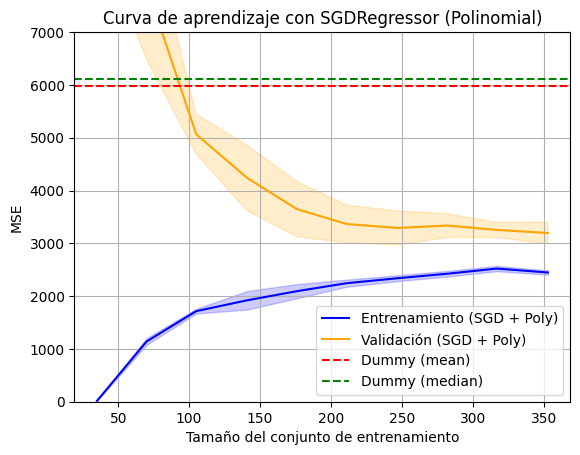

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import learning_curve, cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Datos
X, y = load_diabetes(return_X_y=True)

# Modelo real (pipeline con escalado + SGD con polinomios)
model_poly = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False), # Agregamos términos polinomiales de grado 2
    StandardScaler(),             # Para que la desviación estandar sea de 1
    SGDRegressor(
        loss="squared_error",     # equivalente a MSE
        learning_rate="constant",
        eta0=1e-3,                # tasa de aprendizaje inicial
        max_iter=2000,            # más iteraciones para asegurar convergencia
        tol=1e-3,
        random_state=42,
    )
)

# Curva de aprendizaje del modelo
train_sizes, train_scores, val_scores = learning_curve(
    model_poly, X, y, cv=5, scoring="neg_mean_squared_error",
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Medias y desviaciones
train_mean = -np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
val_mean   = -np.mean(val_scores, axis=1)
val_std    = np.std(val_scores, axis=1)

# ======== Baselines ========

# DummyRegressor con media
dummy_mean = DummyRegressor(strategy="mean")
dummy_mean_scores = cross_val_score(dummy_mean, X, y, cv=5, scoring="neg_mean_squared_error")
baseline_mean = -np.mean(dummy_mean_scores)

# DummyRegressor con mediana
dummy_median = DummyRegressor(strategy="median")
dummy_median_scores = cross_val_score(dummy_median, X, y, cv=5, scoring="neg_mean_squared_error")
baseline_median = -np.mean(dummy_median_scores)

# ======== Gráfica ========

plt.plot(train_sizes, train_mean, label="Entrenamiento (SGD + Poly)", color="blue")
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2, color="blue")

plt.plot(train_sizes, val_mean, label="Validación (SGD + Poly)", color="orange")
plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.2, color="orange")

# Líneas horizontales de los baselines
plt.axhline(y=baseline_mean, color="red", linestyle="--", label="Dummy (mean)")
plt.axhline(y=baseline_median, color="green", linestyle="--", label="Dummy (median)")

plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("MSE")
plt.title("Curva de aprendizaje con SGDRegressor (Polinomial)")
plt.ylim(0, 7000)
plt.legend()
plt.grid()
plt.show()

Contesta las siguientes preguntas:

1. ¿Mejoró el desempeño del modelo?.
2. ¿Qué grado de sesgo presenta el modelo al inicio y al final del entrenamiento?
4. ¿Qué grado de varianza presenta el modelo al inicio y al final del entrenamiento?

1.- Sí, parece que el desempeño del modelo mejoró en comparación con el modelo lineal anterior. La curva de validación alcanza un MSE más bajo, especialmente con conjuntos de entrenamiento más grandes.
2.- Inicio: El sesgo es relativamente alto, como se observa en la gran diferencia entre el error de entrenamiento y el error de validación. Final: El sesgo disminuye, ya que el error de entrenamiento y el error de validación se acercan.
3.- Incio: La varianza es alta, como se evidencia en la gran diferencia entre el error de entrenamiento y el error de validación. Final: La varianza disminuye significativamente, como se ve en la reducción de la brecha entre las curvas.

#### Regularización

Para demostrar cómo la regularización afecta el grado de sesgo y varianza, agrega regularización al SGDRegressor de la siguiente celda. Te recomiendo comenzar probando con regularización tipo Ridge. Consulta la documentación de la clase SGDRegressor para obtener información sobre los argumentos penalty y alpha, que te permitirán definir el tipo de regularización y la intensidad de la misma.

Prueba con distintos valores de alpha. Por ejemplo, utiliza regularización L2 (penalty="l2") y experimenta con valores de alpha como 0.1, 1, 10 y 100.

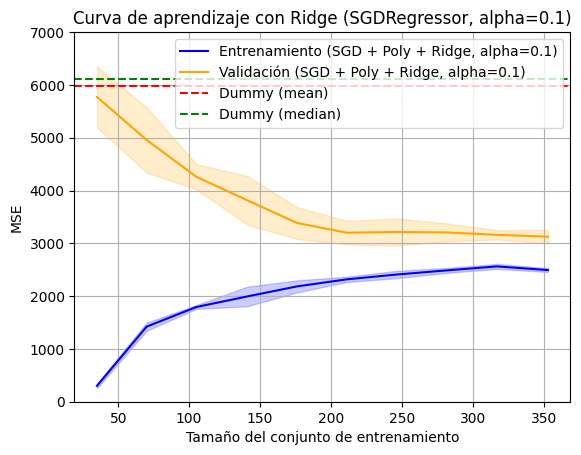

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import learning_curve, cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Datos
X, y = load_diabetes(return_X_y=True)

# ===== Modelo con polinomios + Ridge regularization =====
# Puedes cambiar el valor de alpha aquí para experimentar
alpha_value = 0.1 # Comienza con un valor pequeño de alpha

model_poly_ridge = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    SGDRegressor(
        loss="squared_error",
        learning_rate="constant",
        eta0=1e-3,
        max_iter=2000,
        tol=1e-3,
        random_state=42,
        penalty="l2",  # Regularización Ridge (L2)
        alpha=alpha_value # Intensidad de la regularización
    )
)

# Curva de aprendizaje con polinomios y Ridge
train_sizes, train_scores, val_scores = learning_curve(
    model_poly_ridge, X, y, cv=5, scoring="neg_mean_squared_error",
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Medias y desviaciones
train_mean = -np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
val_mean   = -np.mean(val_scores, axis=1)
val_std    = np.std(val_scores, axis=1)

# ======== Baselines ========
dummy_mean = DummyRegressor(strategy="mean")
dummy_mean_scores = cross_val_score(dummy_mean, X, y, cv=5, scoring="neg_mean_squared_error")
baseline_mean = -np.mean(dummy_mean_scores)

dummy_median = DummyRegressor(strategy="median")
dummy_median_scores = cross_val_score(dummy_median, X, y, cv=5, scoring="neg_mean_squared_error")
baseline_median = -np.mean(dummy_median_scores)

# ======== Gráfica ========
plt.plot(train_sizes, train_mean, label=f"Entrenamiento (SGD + Poly + Ridge, alpha={alpha_value})", color="blue")
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2, color="blue")

plt.plot(train_sizes, val_mean, label=f"Validación (SGD + Poly + Ridge, alpha={alpha_value})", color="orange")
plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.2, color="orange")

plt.axhline(y=baseline_mean, color="red", linestyle="--", label="Dummy (mean)")
plt.axhline(y=baseline_median, color="green", linestyle="--", label="Dummy (median)")

plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("MSE")
plt.title(f"Curva de aprendizaje con Ridge (SGDRegressor, alpha={alpha_value})")
plt.ylim(0, 7000)
plt.legend()
plt.grid()
plt.show()

Edita esta celda para contestar las siguientes preguntas:

1. ¿Qué grado de sesgo (bias) y varianza observas con valores pequeños de alpha (por ejemplo, 0.1)?
2. ¿Qué grado de sesgo (bias) y varianza observas con valores grandes de alpha (por ejemplo, 100)?
3. ¿Cómo explicarías esta diferencia con tus propias palabras?


1.- Sesgo: Bajo, el modelo se ajusta bien a los datos. Varianza: Alta, con alpha=0.1, la curva de validación es significativamente más alta. 2.- Sesgo:

### Regresión con K-Vecinos más cercanos

1. Reemplaza la clase SGDRegressor por KNeighborsRegressor. Comienza con los siguientes parámetros:

- n_neighbors=5,     
- weights="uniform",
- metric="minkowski",
- p=2

2. Consulta en la documentación la función de los parámetros weights y metric
3. Genera la curva de validación correspondiente

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import learning_curve, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Datos
X, y = load_diabetes(return_X_y=True)

# Modelo real (pipeline con escalado + KNN)
model = make_pipeline(
    StandardScaler(),
    # Define aqui tu instanciación de la clase KNeighborsRegressor
)

# Curva de aprendizaje del modelo
train_sizes, train_scores, val_scores = learning_curve(
    model, X, y, cv=5, scoring="neg_mean_squared_error",
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Medias y desviaciones
train_mean = -np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
val_mean   = -np.mean(val_scores, axis=1)
val_std    = np.std(val_scores, axis=1)

# ======== Baselines ========

# DummyRegressor con media
dummy_mean = DummyRegressor(strategy="mean")
dummy_mean_scores = cross_val_score(dummy_mean, X, y, cv=5, scoring="neg_mean_squared_error")
baseline_mean = -np.mean(dummy_mean_scores)

# DummyRegressor con mediana
dummy_median = DummyRegressor(strategy="median")
dummy_median_scores = cross_val_score(dummy_median, X, y, cv=5, scoring="neg_mean_squared_error")
baseline_median = -np.mean(dummy_median_scores)

# ======== Gráfica ========

plt.plot(train_sizes, train_mean, label="Entrenamiento (KNN)", color="blue")
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2, color="blue")

plt.plot(train_sizes, val_mean, label="Validación (KNN)", color="orange")
plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.2, color="orange")

# Líneas horizontales de los baselines
plt.axhline(y=baseline_mean, color="red", linestyle="--", label="Dummy (mean)")
plt.axhline(y=baseline_median, color="green", linestyle="--", label="Dummy (median)")

plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("MSE")
plt.title("Curva de aprendizaje con KNN y baselines")
plt.ylim(0, 7000)  # Ajustar el límite del eje y para mejor visualización
plt.grid()
plt.legend()
plt.show()

Edita esta celda y responde las siguientes preguntas:

1. ¿Mejoró el desempeño del modelo en comparación con el modelo anterior (SGDRegressor)?
2. ¿Qué grado de sesgo presenta el modelo al inicio y al final del entrenamiento?
3. ¿Qué grado de varianza presenta el modelo al inicio y al final del entrenamiento?
4. ¿Qué hiperparámetro consideras que deberíamos ajustar para intentar mejorar el modelo?

La siguiente celda crea una curva de validación en el que el eje horizontal muestra distintos valores del parametro k y el eje vertical el desempeño.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Datos
X, y = load_diabetes(return_X_y=True)

# Modelo KNN dentro de un pipeline con escalado
model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

# Rango de vecinos a probar
param_range = np.arange(1, 31)

# Curva de validación
metric = 'neg_mean_squared_error'  # métrica de evaluación
train_scores, val_scores = validation_curve(
    model, X, y,
    param_name="kneighborsregressor__n_neighbors",  # nombre completo en pipeline
    param_range=param_range,
    cv=5,
    scoring=metric,
    n_jobs=-1
)

# Convertir de MSE negativo a MSE positivo
train_mean = -np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
val_mean   = -np.mean(val_scores, axis=1)
val_std    = np.std(val_scores, axis=1)

# Gráfica
plt.plot(param_range, train_mean, label="Entrenamiento", color="blue")
plt.fill_between(param_range, train_mean-train_std, train_mean+train_std, alpha=0.2, color="blue")

plt.plot(param_range, val_mean, label="Validación", color="orange")
plt.fill_between(param_range, val_mean-val_std, val_mean+val_std, alpha=0.2, color="orange")

plt.xlabel("Número de vecinos (k)")
plt.ylabel("MSE")
plt.title("Curva de validación - KNeighborsRegressor")
plt.legend()
plt.grid()
plt.show()

Contesta las siguientes preguntas:

1. ¿Qué grado de sesgo y varianza se observa para valores pequeños de k?
2. ¿Qué grado de sesgo y varianza se observa para valores grandes de k?
3. ¿Qué valor de k consideras más conveniente y por qué?

#### Hyperparameter tuning

1. Implementa una búsqueda en rejilla con la función GridSearchCV de scikit-learn para encontrar el valor óptimo del parámetro k.
2. Divide el conjunto de datos en entrenamiento y prueba.
3. Realiza la búsqueda de hiperparámetros usando únicamente el conjunto de entrenamiento.
4. Entrena el modelo con el valor óptimo de k que obtuviste en la búsqueda.
5. Evalúa el modelo en el conjunto de prueba y reporta el error de generalización.

In [ ]:
# Tu código aqui

Edita las siguientes celdas para contestar las siguientes preguntas:

1. ¿Cuál es el valor óptimo de k según la busqueda de rejilla?
2. ¿Por qué es importante usar validación cruzada para encontrar el valor óptimo de k?

# Ejemplos extras - utilizando otros tipos de regresores

#### Regressor SVR

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import learning_curve, cross_val_score
from sklearn.svm import SVR
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Datos
X, y = load_diabetes(return_X_y=True)

# Modelo real (pipeline con escalado + SVR)
model = make_pipeline(
    StandardScaler(),
    SVR(
        kernel="rbf",   # kernel RBF (gaussiano), puedes probar "linear" o "poly"
        C=1.0,          # parámetro de regularización
        epsilon=0.1     # margen de tolerancia en la regresión
    )
)

# Curva de aprendizaje del modelo
train_sizes, train_scores, val_scores = learning_curve(
    model, X, y, cv=5, scoring="neg_mean_squared_error",
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Medias y desviaciones
train_mean = -np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
val_mean   = -np.mean(val_scores, axis=1)
val_std    = np.std(val_scores, axis=1)

# ======== Baselines ========

# DummyRegressor con media
dummy_mean = DummyRegressor(strategy="mean")
dummy_mean_scores = cross_val_score(dummy_mean, X, y, cv=5, scoring="neg_mean_squared_error")
baseline_mean = -np.mean(dummy_mean_scores)

# DummyRegressor con mediana
dummy_median = DummyRegressor(strategy="median")
dummy_median_scores = cross_val_score(dummy_median, X, y, cv=5, scoring="neg_mean_squared_error")
baseline_median = -np.mean(dummy_median_scores)

# ======== Gráfica ========

plt.plot(train_sizes, train_mean, label="Entrenamiento (SVR)", color="blue")
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2, color="blue")

plt.plot(train_sizes, val_mean, label="Validación (SVR)", color="orange")
plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.2, color="orange")

# Líneas horizontales de los baselines
plt.axhline(y=baseline_mean, color="red", linestyle="--", label="Dummy (mean)")
plt.axhline(y=baseline_median, color="green", linestyle="--", label="Dummy (median)")

plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("MSE")
plt.title("Curva de aprendizaje con SVR y baselines")
plt.legend()
plt.show()

Curva de validación para el parámetro C del SVR

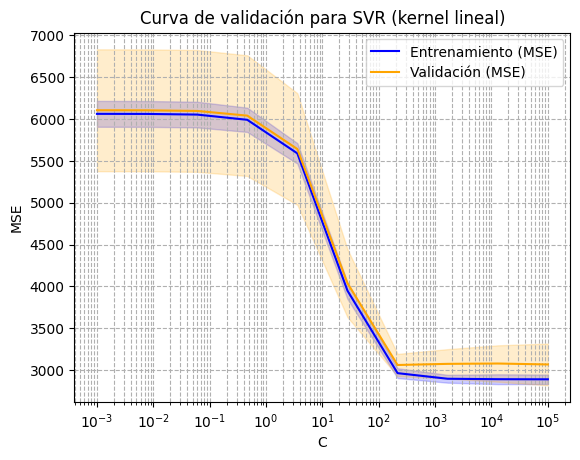

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import validation_curve
from sklearn.svm import SVR

# Datos
X, y = load_diabetes(return_X_y=True)

# Modelo: SVR (kernel lineal por simplicidad)
model = SVR(kernel="linear")

# Rango de valores de C a probar
param_range = np.logspace(-3, 5, 10)  # desde 0.001 hasta 1000

# Curva de validación con MSE
train_scores, val_scores = validation_curve(
    model, X, y,
    param_name="C",
    param_range=param_range,
    cv=5,
    scoring="neg_mean_squared_error",  # usamos MSE
    n_jobs=-1
)

# Convertimos los valores (hacerlos positivos)
train_mean = -np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
val_mean   = -np.mean(val_scores, axis=1)
val_std    = np.std(val_scores, axis=1)

# ======== Gráfica ========
plt.semilogx(param_range, train_mean, label="Entrenamiento (MSE)", color="blue")
plt.fill_between(param_range, train_mean-train_std, train_mean+train_std, alpha=0.2, color="blue")

plt.semilogx(param_range, val_mean, label="Validación (MSE)", color="orange")
plt.fill_between(param_range, val_mean-val_std, val_mean+val_std, alpha=0.2, color="orange")

plt.xlabel("C")
plt.ylabel("MSE")
plt.title("Curva de validación para SVR (kernel lineal)")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

### Regresor HistGradientBoostingRegressor

Ejemplo learning curve para un regresor del tipo HistGradientBoostingRegressor

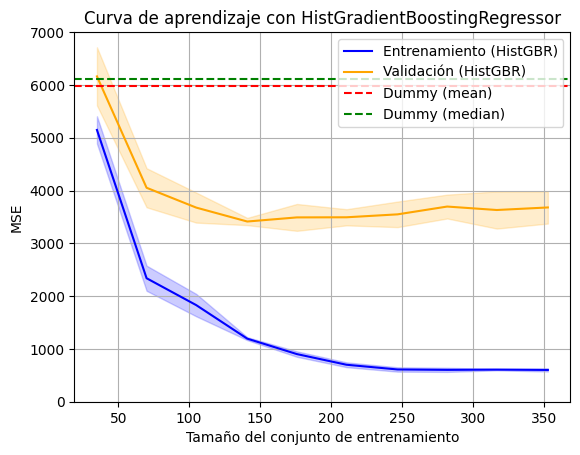

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import learning_curve, cross_val_score
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.dummy import DummyRegressor

# Datos
X, y = load_diabetes(return_X_y=True)

# ===== Modelo con HistGradientBoosting =====
model_hgb = HistGradientBoostingRegressor(
    max_depth=5,        # profundidad máxima de los árboles   probar 5, 2
    learning_rate=0.1,  # tasa de aprendizaje
    max_iter=200,       # número de iteraciones (árboles)  probar 200, 100
    random_state=0,
    min_samples_leaf=30
)

# Curva de aprendizaje
train_sizes, train_scores, val_scores = learning_curve(
    model_hgb, X, y, cv=5, scoring="neg_mean_squared_error",
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Medias y desviaciones
train_mean = -np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
val_mean   = -np.mean(val_scores, axis=1)
val_std    = np.std(val_scores, axis=1)

# ======== Baselines ========
dummy_mean = DummyRegressor(strategy="mean")
dummy_mean_scores = cross_val_score(dummy_mean, X, y, cv=5, scoring="neg_mean_squared_error")
baseline_mean = -np.mean(dummy_mean_scores)

dummy_median = DummyRegressor(strategy="median")
dummy_median_scores = cross_val_score(dummy_median, X, y, cv=5, scoring="neg_mean_squared_error")
baseline_median = -np.mean(dummy_median_scores)

# ======== Gráfica ========
plt.plot(train_sizes, train_mean, label="Entrenamiento (HistGBR)", color="blue")
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2, color="blue")

plt.plot(train_sizes, val_mean, label="Validación (HistGBR)", color="orange")
plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.2, color="orange")

plt.axhline(y=baseline_mean, color="red", linestyle="--", label="Dummy (mean)")
plt.axhline(y=baseline_median, color="green", linestyle="--", label="Dummy (median)")

plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("MSE")
plt.title("Curva de aprendizaje con HistGradientBoostingRegressor")
plt.ylim(0, 7000)
plt.legend()
plt.grid()
plt.show()